## Create Heapmap for paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd  
from matplotlib.patches import Rectangle

In [20]:
patt_4 = pickle.load( open( "orig_4_patt_7.pickle", "rb" ))
patt_3_7 = pickle.load( open( "3_patt_7.pickle", "rb" ))
patt_3_8 = pickle.load( open( "3_patt_8.pickle", "rb" ))
patt_7_7 = pickle.load( open( "7_patt_7.pickle", "rb" ))
patt_7_8 = pickle.load( open( "7_patt_8.pickle", "rb" ))

pacq_4 = pickle.load( open( "4_pacq_7.pickle", "rb" ))
pacq_3_7 = pickle.load( open( "3_pacq_7.pickle", "rb" ))
pacq_3_8 = pickle.load( open( "3_pacq_8.pickle", "rb" ))
pacq_7_7 = pickle.load( open( "7_pacq_7.pickle", "rb" ))
pacq_7_8 = pickle.load( open( "7_pacq_8.pickle", "rb" ))

pacq_4_word_7 = pickle.load( open( "4_word_pacq_7.pickle", "rb" ))
pacq_4_word_8 = pickle.load( open( "4_word_pacq_8.pickle", "rb" ))
pacq_4_visual_7 = pickle.load( open( "4_visual_pacq_7.pickle", "rb" ))
pacq_4_visual_8 = pickle.load( open( "4_visual_pacq_8.pickle", "rb" ))

cos_3_7 = pickle.load( open( "3_cos_7.pickle", "rb" ))
cos_3_8 = pickle.load( open( "3_cos_8.pickle", "rb" ))
cos_vis_7 = pickle.load( open( "visual_cos_7.pickle", "rb" ))
cos_vis_8 = pickle.load( open( "visual_cos_8.pickle", "rb" ))

In [21]:
tests = [patt_4, pacq_4,
         patt_3_7, patt_3_8,
         pacq_3_7, pacq_3_8,
         patt_7_7, patt_7_8, 
         pacq_7_7, pacq_7_8]

mix_tests = [pacq_4_word_7, pacq_4_word_8, pacq_4_visual_7, pacq_4_visual_8]

cos_tests = [cos_3_7, cos_3_8,cos_vis_7, cos_vis_8]

In [22]:
len(pacq_4_visual_8)

23

In [23]:
# create a dictionary with data for each heat map
data_dict = {}
data_dict['test_name'] = ['att (4)', 'acqu (4)',
                          
                          'att (3)(.7)','att (3)(.8)',
                          'acqu (3)(.7)', 'acqu (3)(.8)',
                          
                          'att (7)(.7)','att (7)(.8)',
                             
                          'acqu (7)(.7)', 'acqu (7)(.8)' ]

cosine_dict = {}
cosine_dict['test_name']= ['cos (3)(.7)', 'cos (3)(.8)','cos (visual)(.7)', 'cos (visual)(.8)']

mix_dict = {}
mix_dict['test_name'] = ['acqu (4+word)(.7)', 'acqu (4+word)(.8)', 
                          'acqu (4+visual)(.7)', 'acqu (4+visual)(.8)']


# These loops set up the annotations to be the p-values
p_value = []
corr_value = []
for i in range(len(patt_4)):
    data_dict[i] = [a_list[i][0] for a_list in tests]
    corr_value.append([a_list[i][0] for a_list in tests])
    p_value.append([a_list[i][1] for a_list in tests])
    
cos_p_value = []
cos_corr_value = []
for i in range(len(cos_3_7)):
    cosine_dict[i] = [a_list[i][0] for a_list in cos_tests]
    cos_corr_value.append([a_list[i][0] for a_list in cos_tests])
    cos_p_value.append([a_list[i][1] for a_list in cos_tests])
    
mix_p_value = []
mix_corr_value = []
for i in range(len(pacq_4_visual_8)):
    mix_dict[i] = [a_list[i][0] for a_list in mix_tests]
    mix_corr_value.append([a_list[i][0] for a_list in mix_tests])
    mix_p_value.append([a_list[i][1] for a_list in mix_tests])
    

In [24]:
def create_annotation(values, N, M):
    an = np.zeros((N, M))

    counter = 0
    for p in values:
        curr = []
        for val in p:
            if val < 0.05:

                curr.append(val)

            else:
                curr.append(float("NaN"))

#         print(curr)
        for i in range(len(curr)):
    #         print('an', an[i][i])
            an[i][counter] = curr[i]
        counter = counter+1


    return an

In [25]:
def setup_annotation(p_values, N, M):
    an = np.zeros((N, M))

    counter = 0
    for p in p_values:
        curr = []
        for val in p:
            curr.append("{:.2f}".format(val))

        for i in range(len(curr)):
    #         print('an', an[i][i])
            an[i][counter] = curr[i]
        counter = counter+1
 
    return an

In [26]:
def create_coord_list(tests):
    coord_list = []
    for x, test in enumerate(tests):

        for y, tup in enumerate(test):

            if tup[1] <= 0.05:
                coord_list.append((x,y))
                
    return coord_list

In [36]:
def add_patch(coord_list, ax):
    for x, y in coord_list:
#         print(x,y)
        ax.add_patch(Rectangle((y, x), 1, 1, fill=False, edgecolor='red', lw=10))

In [37]:
orig_an = setup_annotation(corr_value, 10, 25)
cos_an = setup_annotation(cos_corr_value, 4, 23)
mix_an = setup_annotation(mix_corr_value, 4, 23)

In [38]:
orig_anns = pd.DataFrame(orig_an)
cos_anns = pd.DataFrame(cos_an)
mix_anns = pd.DataFrame(mix_an)

In [39]:
orig_df = pd.DataFrame(data_dict)
orig_df.set_index('test_name', inplace=True)

cos_df = pd.DataFrame(cosine_dict)
cos_df.set_index('test_name', inplace=True)

mix_df = pd.DataFrame(mix_dict)
mix_df.set_index('test_name', inplace=True)

In [40]:
orig_annotations = orig_anns.astype(str)
cos_annotations = cos_anns.astype(str)
mix_annotations = mix_anns.astype(str)

In [41]:
def create_heatmap(df, annots, N, M, tests, title):
    fig, ax = plt.subplots(figsize=(N,M))  

    sns.set(font_scale=6)
    ax = sns.heatmap(df, annot=annots, fmt=".5s", cmap="YlGnBu", annot_kws={"size": 46}, linewidths=.5, ax=ax)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 65)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 65)

    coord_list = create_coord_list(tests)
    add_patch(coord_list, ax)
    ax.set_title(title)

    plt.show()

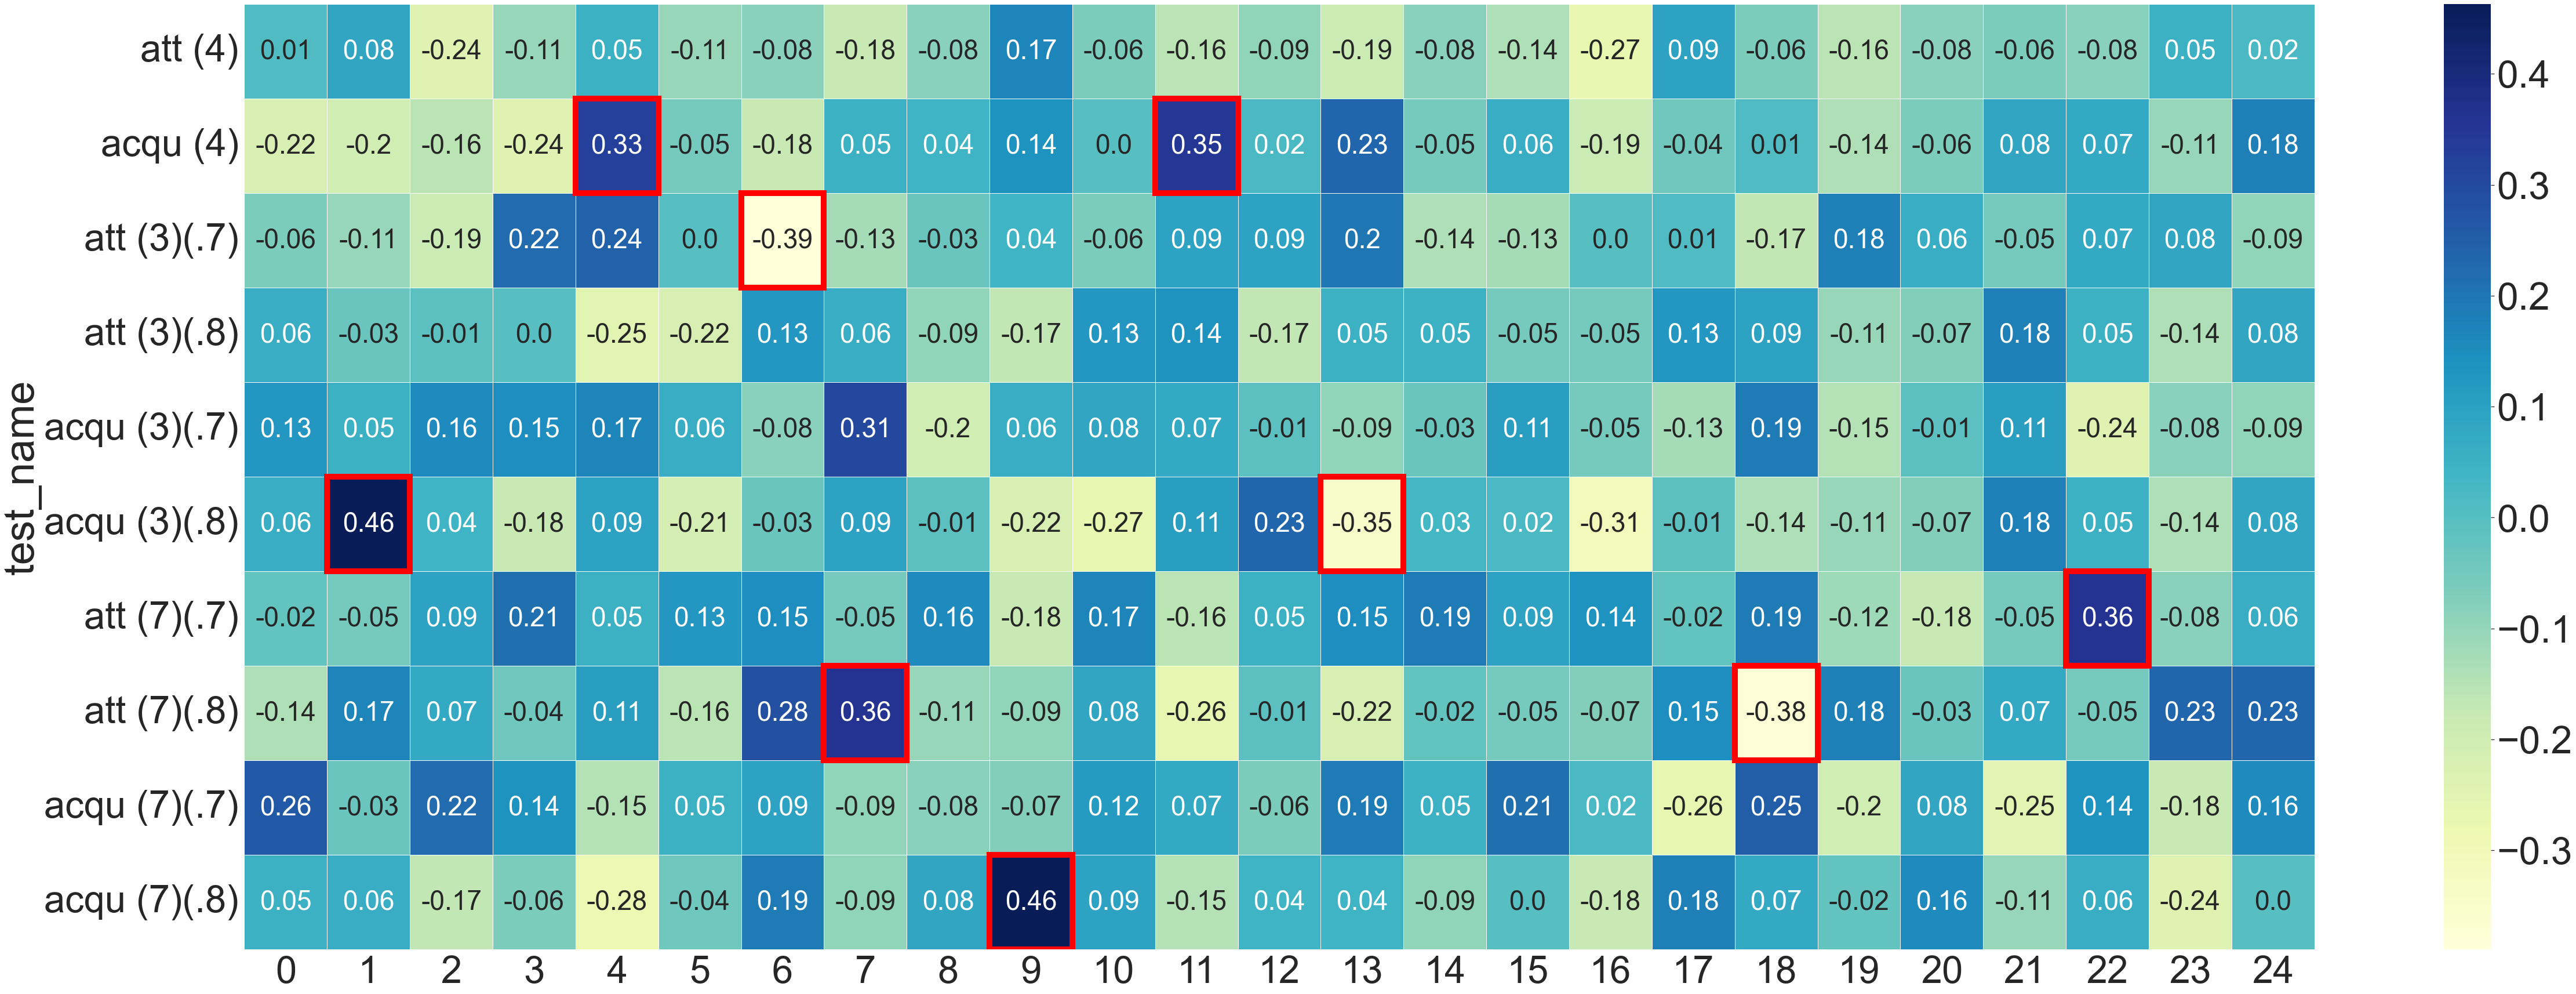

In [42]:
create_heatmap(orig_df, orig_annotations, 80, 30, tests, '')

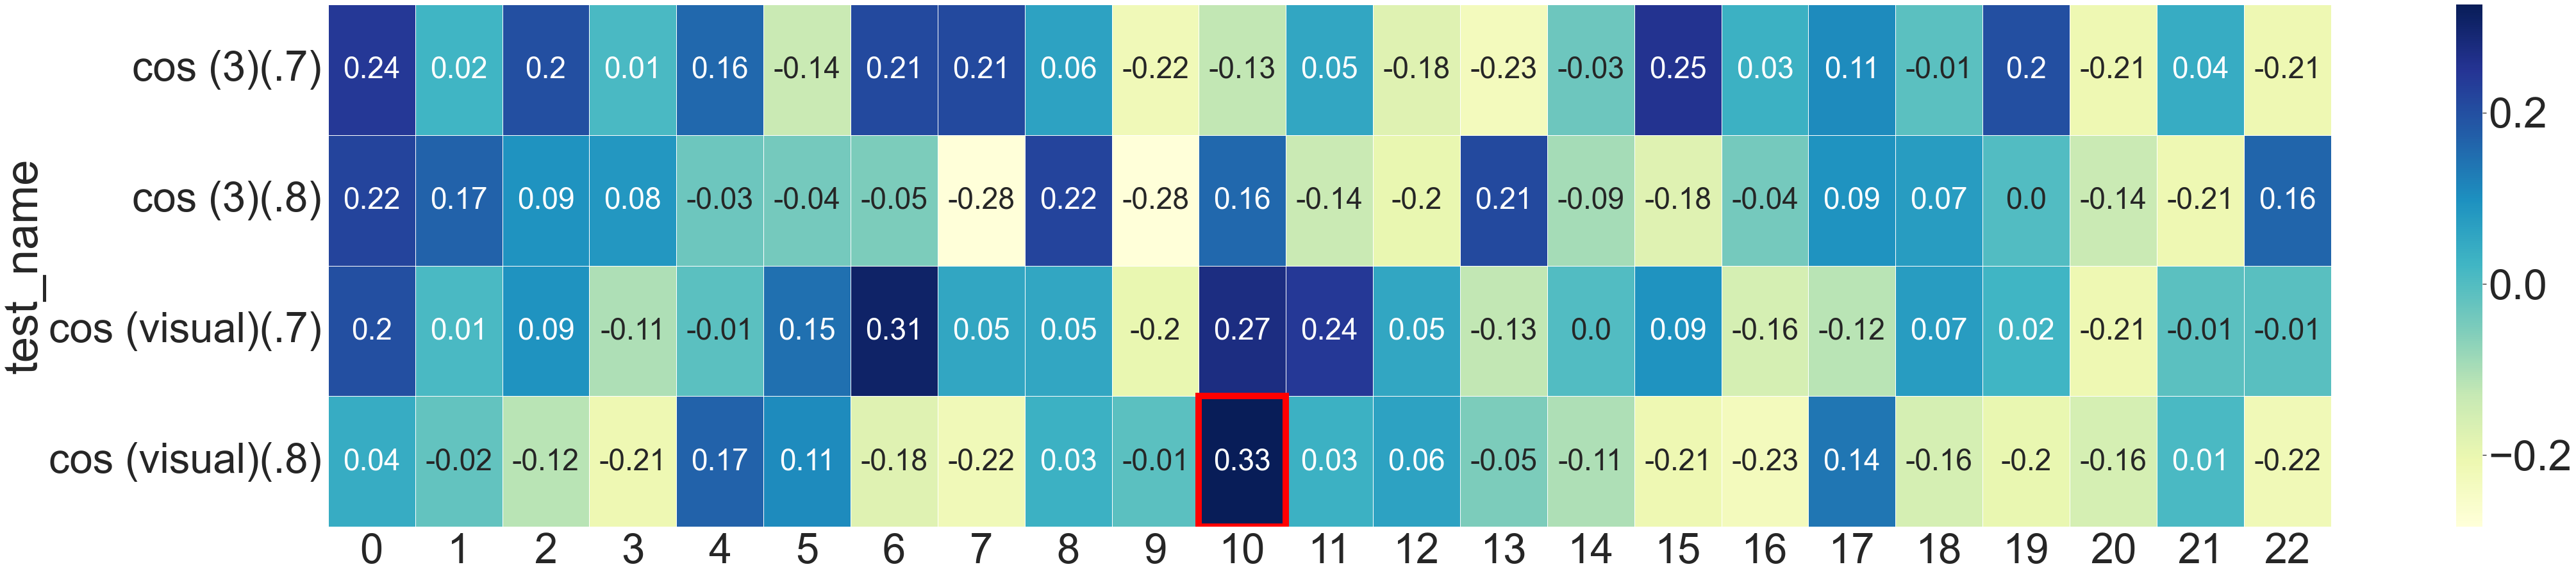

In [43]:
create_heatmap(cos_df, cos_annotations, 70, 15, cos_tests, '')

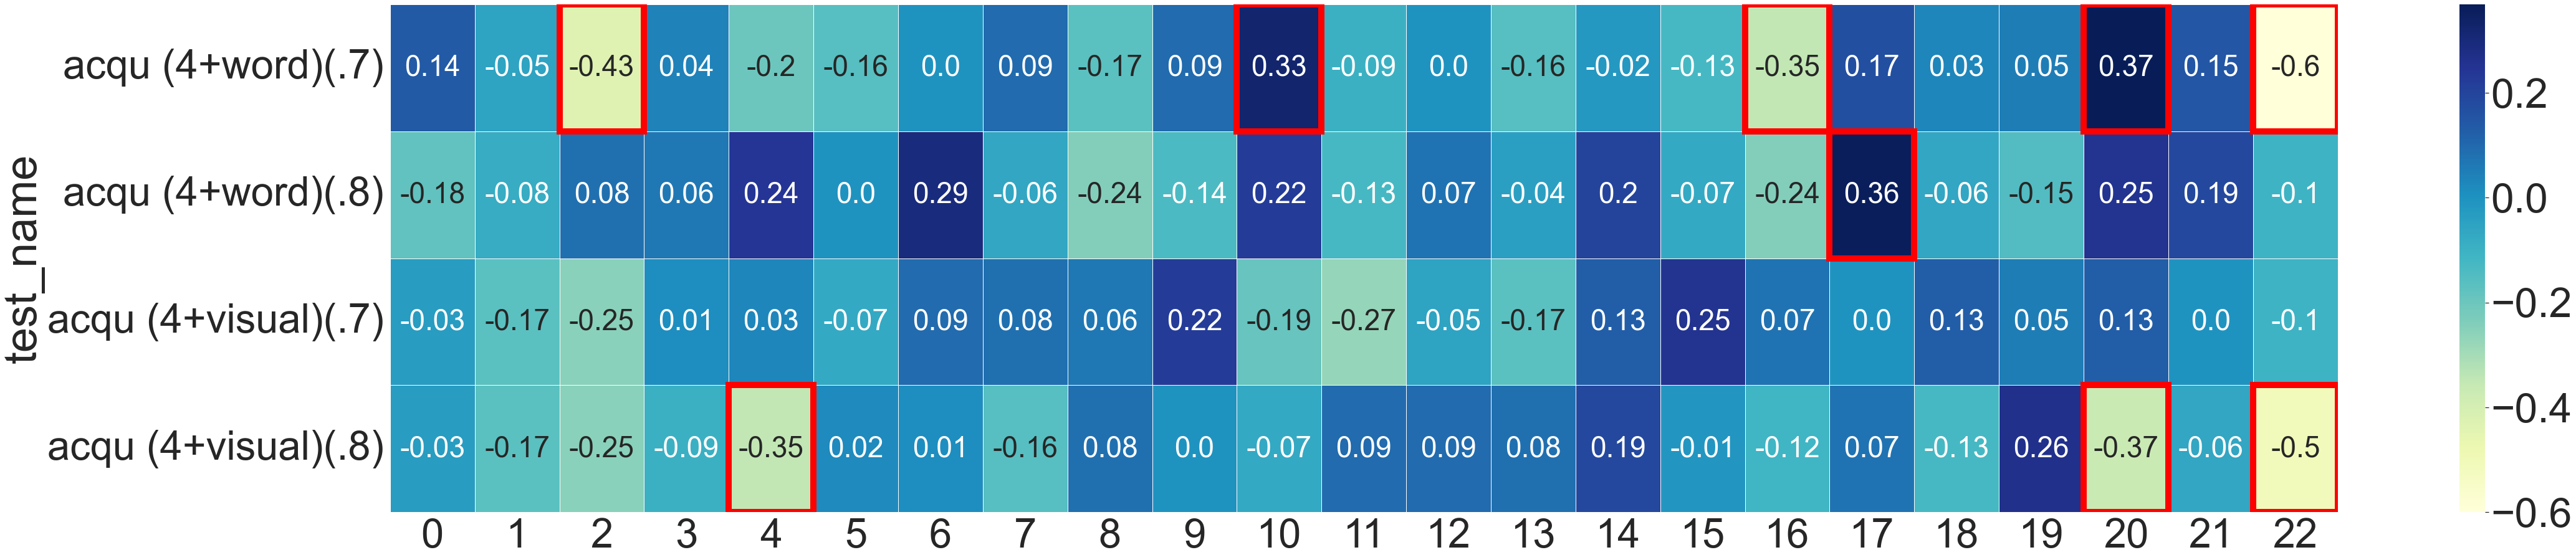

In [44]:
create_heatmap(mix_df, mix_annotations, 70, 15, mix_tests, '')